In [0]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib as plt


In [7]:
x = pd.ExcelFile('Energy Indicators.xls') # http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls
energy = x.parse(skiprows=17,skip_footer=(38))
energy = energy[['Unnamed: 2', 'Petajoules', 'Gigajoules', '%']]
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] =  energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
energy['Energy Supply'] = 1000000*energy['Energy Supply']
energy['Country'] = energy['Country'].replace({'China, Hong Kong Special Administrative Region':'Hong Kong','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Republic of Korea':'South Korea','United States of America':'United States','Iran (Islamic Republic of)':'Iran'})
energy['Country'] = energy['Country'].str.replace(r" \(.*\)","")
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650
...,...,...,...,...
260,NaN,NaN,NaN,NaN
261,NaN,NaN,NaN,NaN
262,NaN,NaN,NaN,NaN
263,NaN,NaN,NaN,NaN


In [8]:
GDP = pd.read_csv('world_bank.csv',skiprows=4) # http://data.worldbank.org/indicator/NY.GDP.MKTP.CD
GDP['Country Name'] = GDP['Country Name'].replace({'Korea, Rep.':'South Korea','Iran, Islamic Rep.':'Iran','Hong Kong SAR, China':'Hong Kong'})
GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']]
GDP.columns = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
GDP

,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,1.050607,1.800226,-0.090708,-10.519748,-3.685030,3.446055,-1.369863,4.198232,0.848228,-0.450586,-0.211225,1.330511,NaN
1,Afghanistan,5.357403,13.826320,3.924984,21.390528,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.665292,1.030660
2,Angola,11.547683,14.010018,11.166138,0.858713,4.859220,3.471981,8.542147,4.954590,4.822626,0.943576,-2.580097,-0.147207,-2.133493
3,Albania,5.900084,5.979982,7.499970,3.350067,3.706891,2.545323,1.417524,1.001989,1.774487,2.218751,3.314805,3.821081,4.145238
4,Andorra,4.536353,0.040011,-8.590004,-3.690654,-5.358826,-4.646543,-1.615218,0.351645,2.277683,0.842204,1.889124,1.724022,1.629345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,4.503032,7.286083,2.642619,3.597141,3.308633,4.377008,2.809626,3.441469,1.222803,4.095281,4.070292,4.226087,3.813314
260,"Yemen, Rep.",3.170409,3.338428,3.647569,3.866230,7.702307,-12.714897,2.392990,4.823519,-0.188690,-16.678463,-13.621458,-5.942320,-2.701475
261,South Africa,5.603798,5.360476,3.191047,-1.538089,3.039731,3.284168,2.213355,2.485201,1.846992,1.193733,0.399088,1.414513,0.787056
262,Zambia,7.903694,8.352436,7.773896,9.220348,10.298206,5.564625,7.597617,5.059376,4.695826,2.919881,3.757178,3.403169,3.794901


In [9]:
GDP.loc[GDP['Country'] == 'China']

,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
38,China,12.719479,14.231388,9.654289,9.399813,10.63614,9.550914,7.859627,7.768615,7.299519,6.905317,6.736675,6.757008,6.566974


In [10]:
ScimEn = pd.read_excel(io='scimagojr.xlsx') # http://www.scimagojr.com/countryrank.php?category=2102
ScimEn = ScimEn[:50]
ScimEn

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,193483,192270,1355524,927458,7.01,196
1,2,United States,143130,139924,1551044,530169,10.84,301
2,3,Japan,41188,40775,357829,93375,8.69,166
3,4,United Kingdom,33293,32300,405816,77019,12.19,185
4,5,India,32064,31167,268746,87658,8.38,153
5,6,Germany,27966,27370,278237,59495,9.95,166
6,7,Russian Federation,26435,26196,68424,29544,2.59,75
7,8,Canada,26148,25571,395467,74112,15.12,193
8,9,France,19696,19214,238639,48462,12.12,152
9,10,Italy,18773,17987,221652,54282,11.81,135


In [11]:
df = pd.merge(ScimEn,energy,how='left',left_on='Country',right_on='Country')
df = pd.merge(df,GDP,how='inner',left_on='Country',right_on='Country')
df = df.set_index('Country')

# the average GDP change 
col = df.loc[: , "2008":"2018"]
df['10years_averageGDP_change'] = col.mean(axis=1)

df_withoutrenewable = df.dropna()
df_withoutrenewable['label'] = df_withoutrenewable['10years_averageGDP_change'].apply(lambda x: (1 if x > 2 else -1))

# calculate the Renewable Energy Supply per Capita ** note that we put more weights on this column to emphasize the impact of renewable energy
df['Renewable Energy Supply per Capita'] = df['Energy Supply per Capita'] * df['% Renewable'] * 10

# create the label that check if the averge rate of change of GDP is doubled
df['label'] = df['10years_averageGDP_change'].apply(lambda x: (1 if x > 2 else -1)) 
df = df.dropna()
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,10years_averageGDP_change,Renewable Energy Supply per Capita,label
Country,,,,,,,,,,,,,,,,,,,,,,,,,,
India,5,32064,31167,268746,87658,8.38,153,3.319500e+10,26.0,14.969080,8.060733,7.660815,3.086698,7.861889,8.497585,5.241345,5.456359,6.386106,7.410228,7.996254,8.169527,7.167889,6.811369,6.735023,3891.96080,1
Germany,6,27966,27370,278237,59495,9.95,166,1.326100e+10,165.0,17.901530,3.814588,2.984077,0.962266,-5.697152,4.178969,3.924133,0.419551,0.428243,2.225689,1.739750,2.230000,2.465030,1.527446,1.309448,29537.52450,-1
Russian Federation,7,26435,26196,68424,29544,2.59,75,3.070900e+10,214.0,17.288680,8.200068,8.499978,5.199969,-7.799994,4.500000,4.300029,3.700057,1.800000,0.699974,-2.307707,0.329281,1.630186,2.254804,1.300600,36997.77520,-1
Canada,8,26148,25571,395467,74112,15.12,193,1.043100e+10,296.0,61.945430,4.165818,6.868609,1.007623,-2.928400,3.089495,3.146881,1.762278,2.330175,2.868454,0.689907,1.107099,2.978566,1.896975,1.631732,183358.47280,-1
South Korea,11,18217,17994,208150,39811,11.43,132,1.100700e+10,221.0,2.279353,5.176154,5.463396,2.829223,0.707510,6.496794,3.681689,2.292398,2.896205,3.341448,2.790236,2.929305,3.062768,2.668311,3.063262,5037.37013,1
Brazil,13,15332,15132,118483,28818,7.73,109,1.214900e+10,59.0,69.648030,3.961989,6.069871,5.094195,-0.125812,7.528226,3.974425,1.921150,3.004865,0.503962,-3.545872,-3.305358,1.063833,1.117587,1.566473,41092.33770,-1
Turkey,17,8968,8707,157567,33600,17.57,136,4.897000e+09,64.0,28.536690,7.109703,5.030458,0.845251,-4.704466,8.487372,11.113496,4.789940,8.491309,5.166691,6.085887,3.183832,7.470867,2.826776,4.886996,18263.48160,1
Norway,18,8437,8323,79053,17256,9.37,98,1.388000e+09,273.0,97.635580,2.399791,2.994252,0.476380,-1.727020,0.701834,0.981469,2.703074,1.034073,1.969544,1.967128,1.071559,2.323258,1.289548,1.162804,266545.13340,-1
Malaysia,20,7253,7002,70334,16961,9.70,98,3.417000e+09,116.0,7.754589,5.584847,6.298786,4.831770,-1.513529,7.424847,5.293913,5.473454,4.693723,6.006722,5.091516,4.449756,5.741830,4.741606,4.748692,8995.32324,1


In [12]:
df.dtypes

Rank                                    int64
Documents                               int64
Citable documents                       int64
Citations                               int64
Self-citations                          int64
Citations per document                float64
H index                                 int64
Energy Supply                         float64
Energy Supply per Capita              float64
% Renewable                           float64
2006                                  float64
2007                                  float64
2008                                  float64
2009                                  float64
2010                                  float64
2011                                  float64
2012                                  float64
2013                                  float64
2014                                  float64
2015                                  float64
2016                                  float64
2017                              

#Principal Component Analysis

In [0]:
from sklearn.preprocessing import StandardScaler

In [14]:
# pca for data with renewable energy
features = ['10years_averageGDP_change', 'Renewable Energy Supply per Capita', 'Energy Supply per Capita', 'H index', 'Citations']
x = df.loc[:, features].values
y = df.loc[:,['label']].values

x = StandardScaler().fit_transform(x)
y

array([[ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1]])

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['label']].reset_index(drop=True)], axis = 1)
finalDf['label'] = finalDf['label'].astype(str)
finalDf

,principal component 1,principal component 2,label
0,0.573830,3.708646,1
1,2.515605,1.401408,-1
2,0.416297,-0.959464,-1
3,5.297450,1.010330,-1
4,1.530302,1.117411,1
5,0.323416,0.414683,-1
6,0.297997,2.096110,1
7,2.779365,-2.203646,-1
8,-0.477146,0.999400,1
9,1.731396,-0.343244,-1


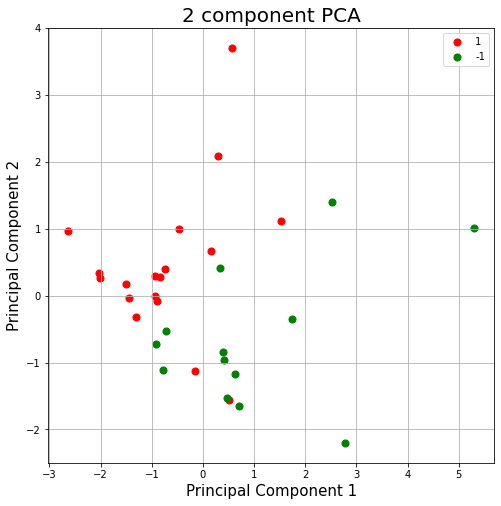

In [16]:
from matplotlib import *
import sys
from pylab import *

fig = pyplot.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
labels = ['1', '-1']
colors = ['r', 'g', 'b']
for label, color in zip(labels,colors):
    indicesToKeep = finalDf['label'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()


In [17]:
temp = pca.explained_variance_ratio_
info = temp.sum()
print(f'The slected features contains {info:.4f} of the information')

The slected features contains 0.7819 of the information


In [18]:
df_withoutrenewable

# pca for data with renewable energy
features = ['10years_averageGDP_change', 'Energy Supply per Capita', 'H index', 'Citations']
x = df_withoutrenewable.loc[:, features].values
y = df_withoutrenewable.loc[:,['label']].values

x = StandardScaler().fit_transform(x)
x

array([[ 2.2372225 , -1.26552116,  1.73858997,  2.09696233],
       [-0.74881312,  0.37353224,  2.07887737,  2.20059408],
       [-0.75368269,  0.95132805, -0.30313443, -0.09034338],
       [-0.57143985,  1.91825163,  2.78562813,  3.48062248],
       [ 0.21642155,  1.0338703 ,  1.18889494,  1.43531769],
       [-0.60735603, -0.87639337,  0.586848  ,  0.45624829],
       [ 1.22013699, -0.81743461,  1.29359876,  0.88300449],
       [-0.82952027,  1.64704136,  0.29891251,  0.02571413],
       [ 1.14401943, -0.20426356,  0.29891251, -0.06948819],
       [-0.49695775,  0.92774454,  1.03183922,  0.39029783],
       [ 0.48184926, -0.31038932, -0.32931039, -0.31792704],
       [-0.32411433, -0.81743461, -0.3816623 , -0.38383382],
       [ 0.96392713,  0.86878579,  0.586848  , -0.05588318],
       [-0.83264235,  0.90416104,  0.06332892, -0.27874985],
       [-2.78229548, -0.51084909,  0.50832014, -0.03075868],
       [-0.55304071, -0.16888831, -0.48636611, -0.53131606],
       [ 0.06333084, -0.

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['label']].reset_index(drop=True)], axis = 1)
finalDf['label'] = finalDf['label'].astype(str)
finalDf

,principal component 1,principal component 2,label
0,1.465881,3.444497,1
1,2.991528,0.469706,-1
2,0.285271,-1.166469,-1
3,4.840001,0.380488,-1
4,2.035520,0.376955,1
5,0.413244,0.298797,-1
6,0.806479,1.945243,1
7,1.043488,-1.403267,-1
8,-0.153764,1.012669,1
9,1.379086,-0.478766,-1


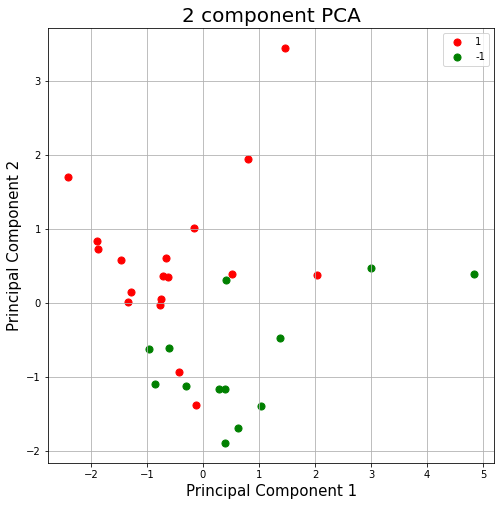

In [20]:
from matplotlib import *
import sys
from pylab import *

fig = pyplot.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
labels = ['1', '-1']
colors = ['r', 'g', 'b']
for label, color in zip(labels,colors):
    indicesToKeep = finalDf['label'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()


In [21]:
temp = pca.explained_variance_ratio_
info = temp.sum()
print(f'The slected features contains {info:.4f} of the information')

The slected features contains 0.8604 of the information


# Linear Regression to get the index

In [0]:
from sklearn import linear_model

In [23]:
features = ['principal component 1', 'principal component 2']
X = finalDf.loc[:, features].values
y = finalDf.loc[:,['label']].values

lm1 = linear_model.Ridge(alpha = 1)
model1 = lm1.fit(X,y)
predictions1 = lm1.predict(X)
accuracy1 = lm1.score(X,y)
print(f'the score is {accuracy1}')

lm2 = linear_model.Ridge(alpha = 100)
model2 = lm2.fit(X,y)
predictions2 = lm2.predict(X)
accuracy2 = lm2.score(X,y)
print(f'the score is {accuracy2}')

lm3 = linear_model.Lasso(alpha = 1)
model3 = lm3.fit(X,y)
predictions3 = lm3.predict(X)
accuracy3 = lm3.score(X,y)
print(f'the score is {accuracy3}')

lm4 = linear_model.LinearRegression()
model4 = lm4.fit(X,y)
predictions4 = lm4.predict(X)
accuracy4 = lm4.score(X,y)
print(f'the score is {accuracy4}')

the score is 0.5245238613779266
the score is 0.2845868281981684
the score is 0.0
the score is 0.5247672957792113


In [24]:
selected_model = linear_model.LinearRegression()
model = selected_model.fit(X,y)
predictions = selected_model.predict(X)
accuracy = selected_model.score(X,y)
print(f'the score is {accuracy}')


predictions = 1/(1 + np.exp(-predictions))
print(f'the final index is {predictions}')

the score is 0.5247672957792113
the final index is [[0.8155326 ]
 [0.38611842]
 [0.37448308]
 [0.26068913]
 [0.4415597 ]
 [0.54826775]
 [0.71418124]
 [0.29900844]
 [0.67252017]
 [0.38232755]
 [0.62583222]
 [0.59000335]
 [0.55237912]
 [0.36618272]
 [0.29318944]
 [0.50574751]
 [0.63438536]
 [0.28630387]
 [0.41959664]
 [0.63351569]
 [0.46232178]
 [0.37512113]
 [0.64684361]
 [0.74490415]
 [0.70486011]
 [0.65772591]
 [0.59936675]
 [0.53145938]
 [0.45351712]
 [0.7560552 ]
 [0.84732756]]


# The main contributions of the index:

## 1. Measure features that are impossible to measure

Reduce the numbers of features in the data set and use two features that can best represent the whole information and a combination of information. These features include but are not limited to energy use, renewable energy use, citation(measurements of the higher education of a country), GDP(measurements of economic activity). Getting rid of the explicit features that are normally used to compute an index, we introduce two black-box features (our two principal components) that implicitly includes all the information and, more importantly, a combination of those features. For example, happiness is hard and almost impossible to measure. But, we know that it comes from some centains features like the education a person received or the economic status of that person. In this sense, our principle components, which is a combination of those features, can be somehow interpreted as measuring happiness. The same logic can be applied to many other features that are hard to measure directly but comes from a combination of those measurable features.

## 2. Considering all aspects in sustainability: societal, environmental, and economical

Taking all the three pillars of sustainable developments into considerations, namely societal, environmental, and economical. The societal aspect is measured as the higher education level of a country which well captures the current circumstances of a society. The economical aspect is simply measured as GDP. See the literature review of GDP for detailed explanation. The environmental aspect is measured as the energy use per capita and the renewable energy use per capita.


## 3. Explicitly make comparison between data with and without renewable energy to emphasize and discover the role of renewable energy

A comparison study is made to explicitly discover the impact of renewable energy to our index. In the code of sample case study, we explicitly take out the column features of renewable energy per capita and research on the differences. 

## 4. Scale invariant

The final index is a value between 0 and 1 which is after normalization. This is a scale invariant measurement which takes into account the fact that different countries might have different society and economic backgrounds. A country has 1.4 billion people like China can be compared with a country like Sweden with only 10 million people.

## 5. Measure the change not the absolute value

Our index uses a label of average change of GPD to train the model to give the predicted index. In this sense, our loss function will try to minimize the prediction by predicting the right change of rate. Thus, the final index is more tuned to fit change.
 

# Directions for future imporvement

## 1. The explainability of the principal conponents: what exact conbination are they talking about.

Since the principle components are mathematically deducted through matrix multiplication and singular value decomposition, it right now seems more like a black box and that contains a combination of information. But, what exactly is the combination of information is still unclear. In the future we could try to possibly do step by step PCA, meaning combining features that are more human interpretable. 

## 2. The possibility of multi-class label.

The current label has only 1 or -1, depending on whether the average change in GDP is doubled or not with respect to all the features. In the future, there could be more detailed labels about evaluating a specific range. The current sample study just discriminates based on whether their average rate of change in GDP(GDP_avg_change) is doubled in the last 10 years or not. In the future, we can have more detailed labels like 0 (GDP_avg_change<0), 1 (0<GDP_avg_change<1), 2 (1<GDP_avg_change<2), 3 (2<GDP_avg_change). 